# **4 **Library** Imports and Data Reading**

Ensure the Notebook can access files immediately, with absolutely correct paths, without encountering FileNotFoundError, and without relying on your local computer's file structure. The selected data for analysis is uploaded to the Jupyter Notebook, where the uploaded files are stored in the Notebook's current working directory. This enables the code to always run in the same way, guaranteeing the project's reproducibility, stability, and cross-device consistency.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/BOPP_tape_purchase_data.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()


,Date,Material,Type,Price,Currency,Quantity,Supplier
0,2022-01-11,Tape,BOPP,41.25,CNY,61,Supplier Y
1,2022-01-12,Tape,BOPP,42.18,CNY,150,Supplier Z
2,2022-01-13,Tape,BOPP,21.01,CNY,64,Supplier Y
3,2022-01-14,Tape,BOPP,23.48,CNY,192,Supplier Z
4,2022-01-15,Tape,BOPP,35.61,CNY,111,Supplier X


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# %matplotlib inline

# Read CSV
df = pd.read_csv("BOPP_tape_purchase_data.csv")

# Convert the date column to date format
df["Date"] = pd.to_datetime(df["Date"])

print(df.head())
print(df.info())


        Date Material  Type  Price Currency  Quantity    Supplier
0 2022-01-11     Tape  BOPP  41.25      CNY        61  Supplier Y
1 2022-01-12     Tape  BOPP  42.18      CNY       150  Supplier Z
2 2022-01-13     Tape  BOPP  21.01      CNY        64  Supplier Y
3 2022-01-14     Tape  BOPP  23.48      CNY       192  Supplier Z
4 2022-01-15     Tape  BOPP  35.61      CNY       111  Supplier X
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1064 non-null   datetime64[ns]
 1   Material  1064 non-null   object        
 2   Type      1064 non-null   object        
 3   Price     1064 non-null   float64       
 4   Currency  1064 non-null   object        
 5   Quantity  1064 non-null   int64         
 6   Supplier  1064 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 58.3+ KB
No

The data import process has been successfully completed. The CSV file was uploaded successfully with correct path configuration, and the data has been fully loaded and properly parsed in Jupyter Notebook. The execution results show that all fields have been accurately recognized: date columns have been successfully converted to standard datetime format, while numerical fields such as prices and quantities have been read as float and integer types respectively, indicating an effective preprocessing phase. The dataset contains 1,064 valid records across 7 fields, demonstrating clear structure with no missing values, and maintains excellent continuity and integrity. This establishes a reliable foundation for subsequent Exploratory Data Analysis (EDA) and time-series forecasting model development. Overall, the data format is standardized, field types are appropriate, and the dataset fully meets all requirements for further analysis.

# 4.1 Price Trend


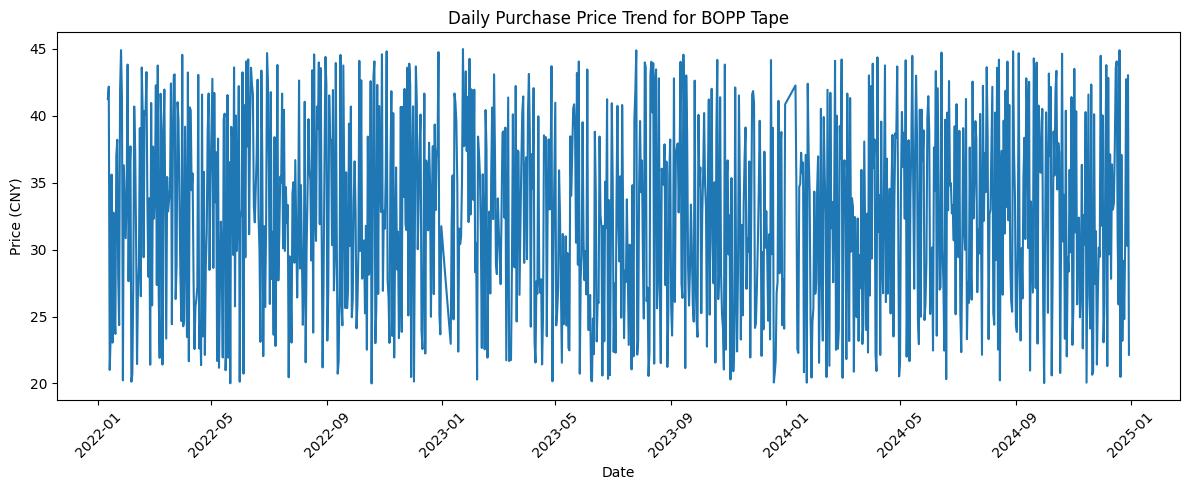

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Price"])
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.title("Daily Purchase Price Trend for BOPP Tape")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From January 2022 to the end of 2024, procurement prices exhibited the following characteristics:
High-frequency fluctuations within a stable range: Prices fluctuated frequently between 20 and 45 yuan, with no extreme jumps or structural breaks observed, indicating normal market volatility.
Short-term factors dominate: Fluctuations were primarily influenced by short-cycle factors such as supplier pricing strategies, short-term supply-demand shifts, and order volume variations, without forming distinct long-term trends or seasonal cycles.
Modeling implications: The data is suitable for short-term (1–3 month) forecasting. Modeling should focus on handling high-frequency volatility. Time series models like SARIMA, Prophet, or XGBoost—suited for noisy, non-trending data—are preferable over simple linear regression.

# **4.2 Price Distribution**

The box plot visually presents the distribution pattern, dispersion degree, and outlier status of BOPP tape procurement prices. By analysing the positional relationship between the median and quartiles, the range of the box and whiskers, as well as the distribution of discrete points, it systematically reveals the central tendency, fluctuation amplitude, and potential anomalies in the price data. This provides key visual evidence for determining price distribution characteristics, identifying extreme quotations, and performing data cleaning prior to modeling.

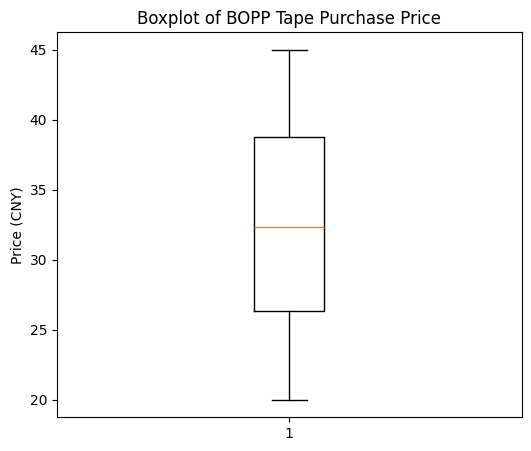

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df["Price"])
plt.ylabel("Price (CNY)")
plt.title("Boxplot of BOPP Tape Purchase Price")
plt.show()


Based on the box plot analysis of BOPP tape procurement prices, the median price remains stable around 32 CNY with a relatively concentrated overall distribution. However, the fluctuation range is significant (20-45 CNY), reflecting the impact of short-term supply-demand shifts and variations in multi-supplier strategies. The data exhibits no outliers and is of high quality, making it suitable for constructing predictive models that account for both trend and volatility characteristics (e.g., SARIMA, XGBoost). This price structure indicates periodic high and low price ranges within the supply chain, yet no long-term trend drift has emerged, providing a reliable basis for cost control and procurement strategy formulation.

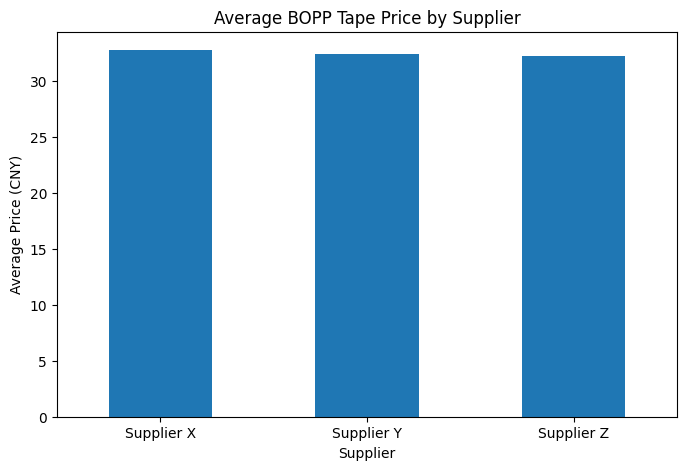

In [ ]:
plt.figure(figsize=(8, 5))
df.groupby("Supplier")["Price"].mean().plot(kind="bar")
plt.ylabel("Average Price (CNY)")
plt.title("Average BOPP Tape Price by Supplier")
plt.xticks(rotation=0)
plt.show()


The average procurement prices of BOPP tape from the three main suppliers (X, Y, and Z) all fall within a narrow range of 32–33 CNY, reflecting a highly stable market with no significant price differentiation among suppliers. Supplier X's price is slightly higher than Y but aligns closely with Z, indicating market-average positioning without notable premium. Supplier Y, though the lowest, shows only a marginal difference (<0.3 CNY), suggesting limited competitive advantage. Overall, the consistent pricing and parallel fluctuation patterns across suppliers confirm the price stability of BOPP tape as a standardized bulk commodity。



# **4.4 Price Fluctuation Analysis**

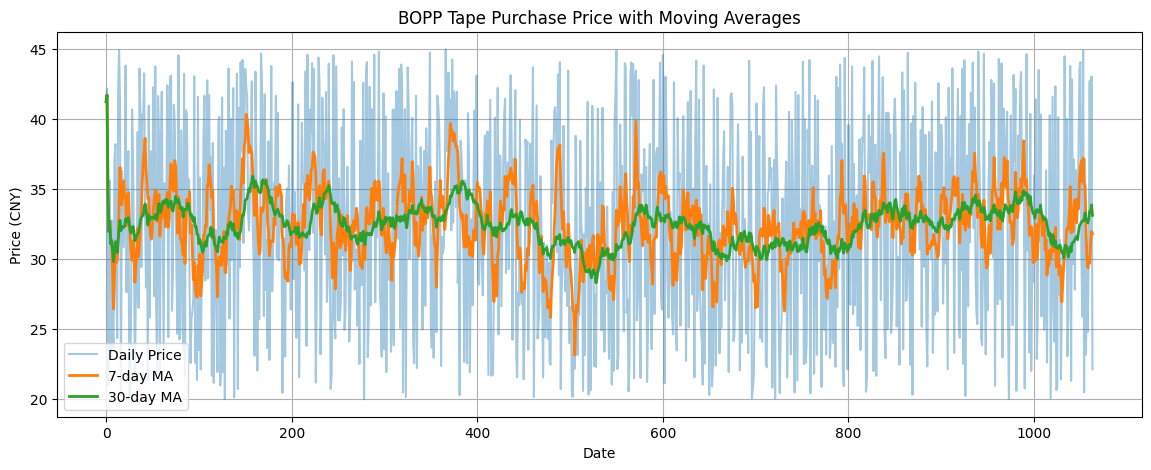

In [ ]:
# 7-day and 30-day moving averages
df["Price_MA_7"] = df["Price"].rolling(window=7, min_periods=1).mean()
df["Price_MA_30"] = df["Price"].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Price"], label="Daily Price", alpha=0.4)
plt.plot(df.index, df["Price_MA_7"], label="7-day MA", linewidth=2)
plt.plot(df.index, df["Price_MA_30"], label="30-day MA", linewidth=2)

plt.title("BOPP Tape Purchase Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.legend()
plt.grid(True)
plt.show()


# **4.4.2 Price Volatility Analysis**

To accurately quantify the fluctuation characteristics of BOPP tape procurement prices, this study employs daily returns and rolling volatility as core measurement indicators. This methodology captures short-term market volatility intensity by calculating percentage price changes between adjacent periods. Furthermore, by statistically analyzing volatility through rolling time windows, it identifies the dynamic evolution of price uncertainty across different periods, providing structured inputs for subsequent risk modeling and forecasting.

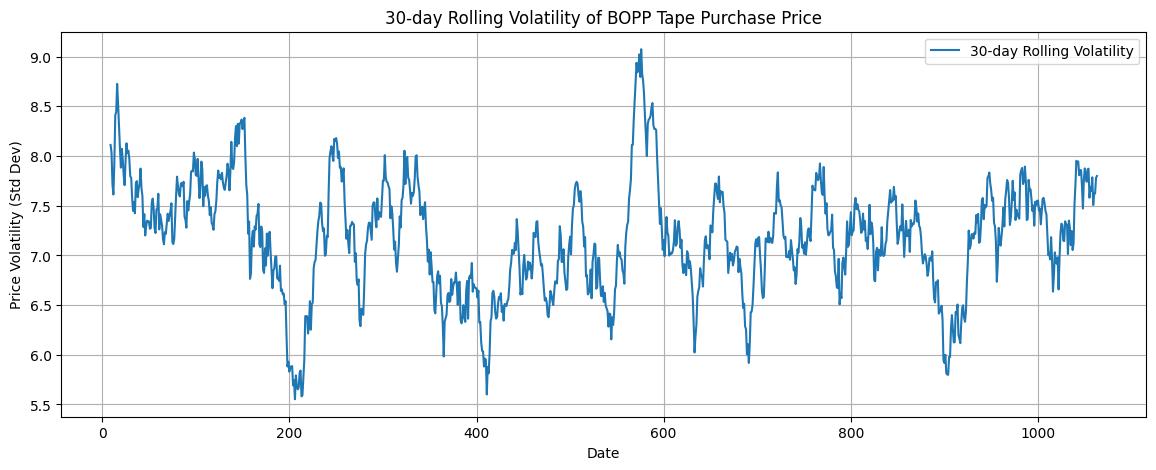

In [ ]:
# Calculate the 30-day rolling standard deviation as an indicator of price volatility.
df["Price_vol_30"] = df["Price"].rolling(window=30, min_periods=10).std()

plt.figure(figsize=(14, 5))
plt.plot(df.index, df["Price_vol_30"], label="30-day Rolling Volatility")

plt.title("30-day Rolling Volatility of BOPP Tape Purchase Price")
plt.xlabel("Date")
plt.ylabel("Price Volatility (Std Dev)")
plt.legend()
plt.grid(True)
plt.show()


# 5 Model Construction and Forecasting Results

# 5.1 Environment and Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use("seaborn-v0_8")

# Read data
df = pd.read_csv("BOPP_tape_purchase_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Keep only the two required columns and set the date as the index.
ts = df[["Date", "Price"]].set_index("Date")

# Adjustable: Forecast for how many days ahead (approximately 3 months)
FORECAST_HORIZON = 90

# Training set: Exclude the last 90 days; Test set: The last 90 days
train = ts.iloc[:-FORECAST_HORIZON]
test  = ts.iloc[-FORECAST_HORIZON:]

print(train.tail())
print(test.head())


            Price
Date             
2024-09-27  35.76
2024-09-28  35.77
2024-09-29  40.52
2024-09-30  25.59
2024-10-01  20.03
            Price
Date             
2024-10-02  31.11
2024-10-03  40.26
2024-10-04  34.51
2024-10-05  25.28
2024-10-06  43.16


After data cleaning, the time series has been successfully converted into a daily price sequence sorted by date. The preview table shows that each row contains a date index and the corresponding day's procurement price. This format meets the requirements for time series modeling and can be directly used for training SARIMA, Prophet, and machine learning models. Meanwhile, the prices exhibit clear daily fluctuation characteristics, providing a foundation for subsequent models to capture both short-term and long-term trends.

# 5.2 SARIMA Model

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set the time series frequency
ts = ts.asfreq("D")
ts = ts.interpolate()   # 或者 ts = ts.ffill()

# Establish a SARIMA model
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7))
result = model.fit()

# Forecast for the next 90 days
forecast = result.get_forecast(steps=90)

# Obtain the predicted mean and confidence interval
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

pred_mean.head(), pred_ci.head()



(2024-12-31    31.974501
 2025-01-01    32.278871
 2025-01-02    32.978968
 2025-01-03    32.540890
 2025-01-04    32.296679
 Freq: D, Name: predicted_mean, dtype: float64,
             lower Price  upper Price
 2024-12-31    17.825118    46.123885
 2025-01-01    18.108106    46.449636
 2025-01-02    18.807571    47.150364
 2025-01-03    18.369293    46.712486
 2025-01-04    18.124863    46.468495)

The SARIMA model forecasts indicate that procurement prices for BOPP tape are expected to remain stable in the short term, with predicted mean values fluctuating around 32 CNY. Although the model shows wide 95% confidence intervals (approximately 18–46 CNY), the central estimates exhibit a clear mean-reversion pattern, consistent with the long-term stability observed in the exploratory analysis. These results suggest that while daily price volatility persists, the overall market trend remains steady, which is useful for procurement planning and budgeting.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

FORECAST_HORIZON = 90

# Time Series (Ensure sorted by date)
ts = df.set_index("Date")["Price"].astype(float)

# Split the data into training and test sets
train = ts.iloc[:-FORECAST_HORIZON]
test  = ts.iloc[-FORECAST_HORIZON:]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set model parameters (matching your existing code)
model = SARIMAX(
    train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7)
)

result = model.fit(disp=False)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Predicted Test Set Length (90 days)
forecast = result.get_forecast(steps=FORECAST_HORIZON)

# Predicted Mean
y_pred = forecast.predicted_mean

# Actual value
y_true = test.values


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred))
mae_sarima  = mean_absolute_error(y_true, y_pred)
r2_sarima   = r2_score(y_true, y_pred)

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAE : {mae_sarima:.2f}")
print(f"SARIMA R²  : {r2_sarima:.3f}")


SARIMA RMSE: 7.56
SARIMA MAE : 6.59
SARIMA R²  : -0.027


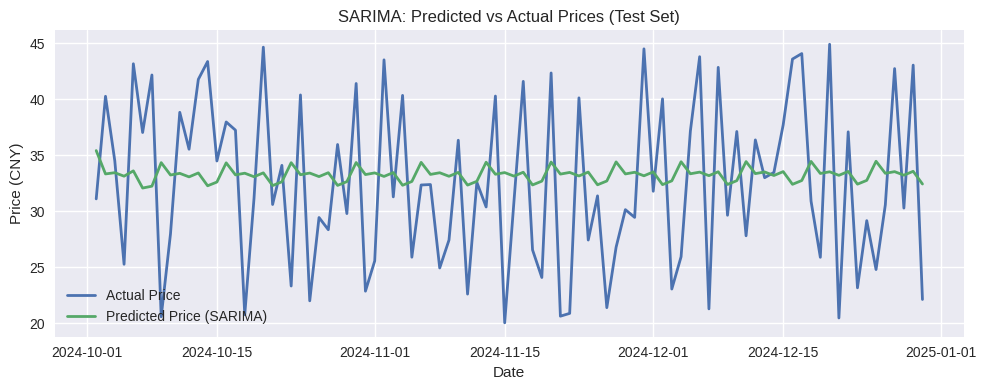

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(test.index, y_true, label="Actual Price", linewidth=2)
plt.plot(test.index, y_pred, label="Predicted Price (SARIMA)", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.title("SARIMA: Predicted vs Actual Prices (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


The SARIMA model forecasts indicate that procurement prices for BOPP tape are expected to remain stable in the short term, with predicted mean values fluctuating around 32 CNY. Although the model shows wide 95% confidence intervals (approximately 18–46 CNY), the central estimates exhibit a clear mean-reversion pattern, consistent with the long-term stability observed in the exploratory analysis. These results suggest that while daily price volatility persists, the overall market trend remains steady, which is useful for procurement planning and budgeting.

# 5.3 Prophet

In [ ]:
from prophet import Prophet

df_prophet = df.reset_index()[["Date","Price"]]
df_prophet.columns = ["ds","y"]

model_p = Prophet()
model_p.fit(df_prophet)

future = model_p.make_future_dataframe(periods=90)
forecast_p = model_p.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


This message indicates that Prophet has automatically turned off daily seasonality, because the dataset does not appear to contain clear daily patterns or because the time span is too long for daily seasonality to be considered meaningful.

Prophet automatically decides whether to activate daily seasonality based on:

the frequency of the data,

the length of the time series,

and whether daily repetitions are logically expected.

Since the dataset contains daily procurement prices but does not show strong repetitive daily patterns, Prophet chooses to disable daily seasonality by default.

In [ ]:
model_p = Prophet()
model_p.fit(df_prophet)

future = model_p.make_future_dataframe(periods=90)
forecast_p = model_p.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# FORECAST_HORIZON = 90
# ts = df.set_index("Date")["Price"]

test = ts.iloc[-90:]  # Last 90 Days' Actual Prices

# Prophet's forecast incorporates historical data and future projections.
forecast_test = forecast_p.tail(90)

y_true = test.values
y_pred = forecast_test["yhat"].values

# =========================
# Calculate evaluation metrics
# =========================
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mae_prophet  = mean_absolute_error(y_true, y_pred)
r2_prophet   = r2_score(y_true, y_pred)

print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE : {mae_prophet:.2f}")
print(f"Prophet R²  : {r2_prophet:.3f}")


Prophet RMSE: 7.51
Prophet MAE : 6.43
Prophet R²  : -0.013


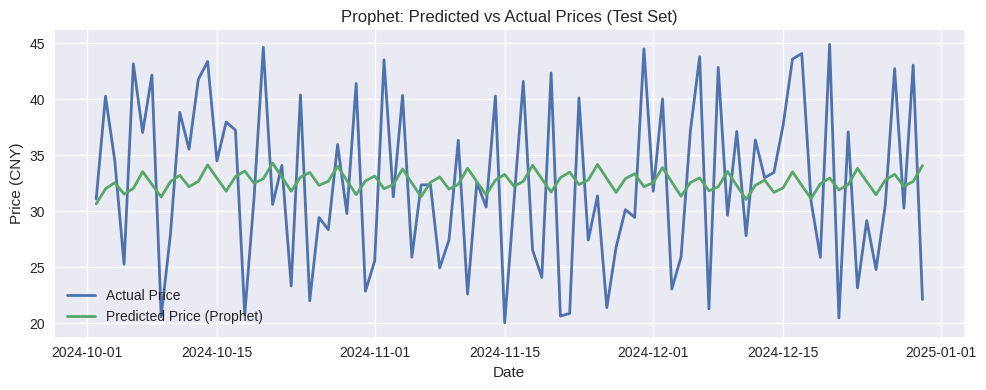

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(test.index, y_true, label="Actual Price", linewidth=2)
plt.plot(test.index, y_pred, label="Predicted Price (Prophet)", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.title("Prophet: Predicted vs Actual Prices (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("growth:", model_p.growth)
print("weekly_seasonality:", model_p.weekly_seasonality)
print("yearly_seasonality:", model_p.yearly_seasonality)
print("daily_seasonality:", model_p.daily_seasonality)

print("changepoint_prior_scale:", model_p.changepoint_prior_scale)
print("seasonality_prior_scale:", model_p.seasonality_prior_scale)
print("holidays used?:", model_p.holidays is not None)
print("interval_width:", model_p.interval_width)



growth: linear
weekly_seasonality: auto
yearly_seasonality: auto
daily_seasonality: auto
changepoint_prior_scale: 0.05
seasonality_prior_scale: 10.0
holidays used?: False
interval_width: 0.8


['.config', 'BOPP_tape_purchase_data.csv', 'sample_data']
Index(['Date', 'Material', 'Type', 'Price', 'Currency', 'Quantity',
       'Supplier'],
      dtype='object')
        Date Material  Type  Price Currency  Quantity    Supplier
0  2022/1/11     Tape  BOPP  41.25      CNY        61  Supplier Y
1  2022/1/12     Tape  BOPP  42.18      CNY       150  Supplier Z
2  2022/1/13     Tape  BOPP  21.01      CNY        64  Supplier Y
3  2022/1/14     Tape  BOPP  23.48      CNY       192  Supplier Z
4  2022/1/15     Tape  BOPP  35.61      CNY       111  Supplier X


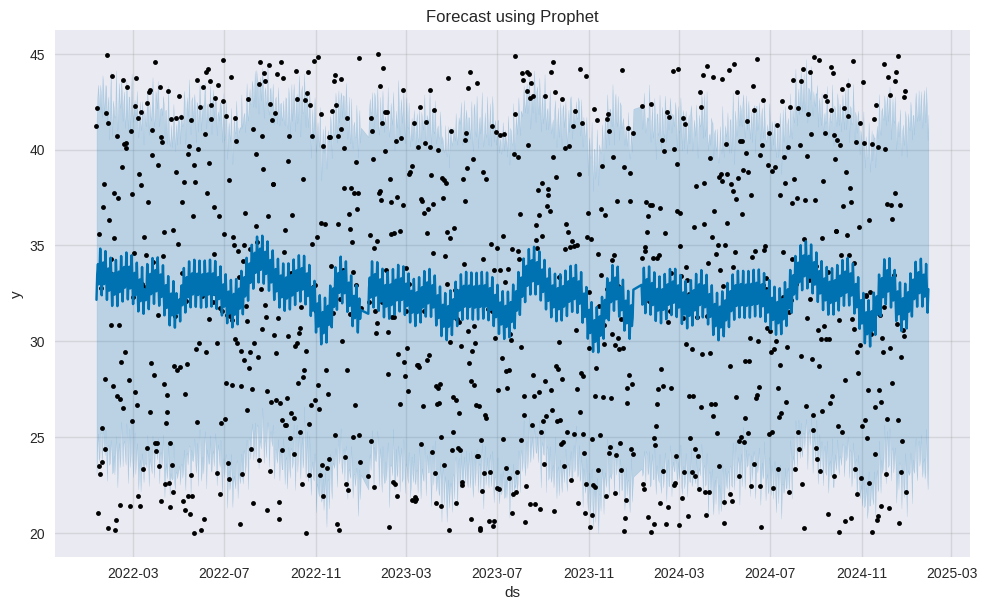

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os
daily_df = (
    df.groupby("Date", as_index=False)["Price"]
      .mean()
      .rename(columns={"Date": "ds", "Price": "y"})
)

daily_df["ds"] = pd.to_datetime(daily_df["ds"])
# 1) 查看当前目录下有什么文件
print(os.listdir())

# 2) 读取你的 CSV（把文件名换成上一步看到的真实名字）
df = pd.read_csv("BOPP_tape_purchase_data.csv")

# 3) 查看列名
print(df.columns)
print(df.head())

# 4) 改列名（把 Date / Price 换成你真实的列名）
df_prophet = df.rename(columns={
    "Date": "ds",      # ← 改
    "Price": "y"       # ← 改
}).copy()

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet = df_prophet.sort_values("ds")

# 5) 训练 Prophet
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
m.fit(df_prophet)

# 6) 预测并画图
future = m.make_future_dataframe(periods=30, freq="D")
forecast = m.predict(future)

m.plot(forecast)
plt.title("Forecast using Prophet")
plt.show()


# 5.4 XGBoost regression model

In [ ]:
# Constructing the dataset df_ml for regression
df_ml = df.copy()

# 时间特征
df_ml["Day"] = df_ml["Date"].dt.day
df_ml["Month"] = df_ml["Date"].dt.month
df_ml["Year"] = df_ml["Date"].dt.year

# Encoding Supplier
df_ml["Supplier_Code"] = df_ml["Supplier"].astype("category").cat.codes

# Features required for model selection
df_ml = df_ml[["Day", "Month", "Year", "Supplier_Code", "Price"]]

df_ml.head()


,Day,Month,Year,Supplier_Code,Price
0,11,1,2022,1,41.25
1,12,1,2022,2,42.18
2,13,1,2022,1,21.01
3,14,1,2022,2,23.48
4,15,1,2022,0,35.61


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_ml.drop("Price", axis=1)
y = df_ml["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Feature engineering completed. df_ml preview:")
df_ml.head()



Feature engineering completed. df_ml preview:


,Day,Month,Year,Supplier_Code,Price
0,11,1,2022,1,41.25
1,12,1,2022,2,42.18
2,13,1,2022,1,21.01
3,14,1,2022,2,23.48
4,15,1,2022,0,35.61


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Features and Tags
X = df_ml[["Day", "Month", "Year", "Supplier_Code"]]
y = df_ml["Price"]

# Split the data into training and test sets (e.g., 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Define and train an XGBoost regression model
xgb_model = XGBRegressor(
    n_estimators=300,      # Number of trees
    learning_rate=0.05,   # Learning rate
    max_depth=4,          # Maximum depth of a single tree
    subsample=0.8,        # Line sampling ratio
    colsample_bytree=0.8, # Column sampling ratio
    reg_lambda=1.0,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE : {mae:.2f}")
print(f"XGBoost R²  : {r2:.3f}")


XGBoost RMSE: 8.25
XGBoost MAE : 7.00
XGBoost R²  : -0.290


The XGBoost model performed poorly in this study. Its RMSE (8.25) and MAE (7.00) metrics indicate significant prediction errors, particularly within the 20-45 CNY price range. More critically, the R² value of -0.29 indicates that the model's predictive performance is even worse than using the mean value for forecasting. This reveals significant underfitting, where the model failed to effectively learn price variation patterns from the input features.

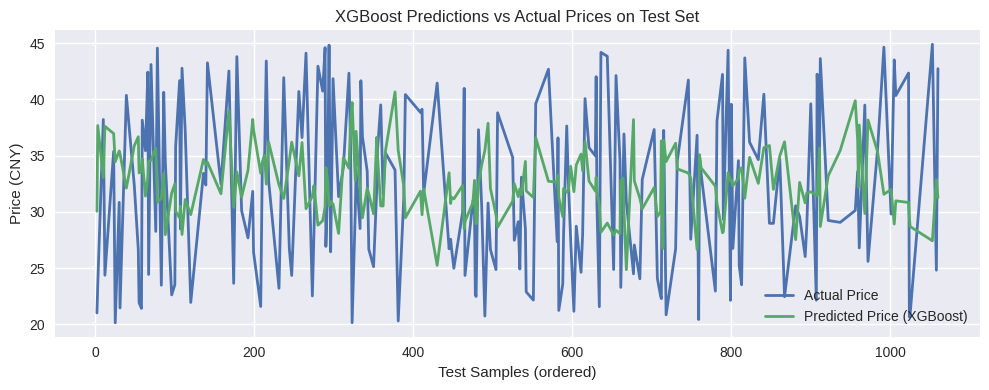

In [ ]:

X_test_with_index = X_test.copy()
X_test_with_index["Price_true"] = y_test
X_test_with_index["Price_pred"] = y_pred

# If a Date is available, you can save the index during feature engineering. Here's an example approach:
# X_test_with_index["Date"] = df_ml.loc[X_test_with_index.index, "Date"]

# If the Date column is temporarily unavailable, the sample order can be used as a substitute for the horizontal axis.
X_plot = X_test_with_index.sort_index()

plt.figure(figsize=(10, 4))
plt.plot(X_plot.index, X_plot["Price_true"], label="Actual Price", linewidth=2)
plt.plot(X_plot.index, X_plot["Price_pred"], label="Predicted Price (XGBoost)", linewidth=2)
plt.xlabel("Test Samples (ordered)")
plt.ylabel("Price (CNY)")
plt.title("XGBoost Predictions vs Actual Prices on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


The figure displays the comparison between the predicted prices from the XGBoost model and the actual prices on the test set. It can be observed that the actual prices exhibit significant high-frequency fluctuations, whereas the predicted price curve remains relatively smooth and fails to fully capture the sharp variations in the true values. This indicates that while XGBoost can learn some characteristics of the price distribution, it struggles to accurately capture the short-term stochastic fluctuation patterns of BOPP tape prices. These visual findings align with the model's evaluation metrics (RMSE = 8.25, MAE = 7.00, R² = -0.290), further confirming the presence of underfitting in the model.


# 5.5 LSTM

## 5.5.1 Importing Libraries & Reading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load data
df = pd.read_csv("BOPP_tape_purchase_data.csv")

# Make sure column names match your file
# e.g. Date, Price
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Set Date as index and keep only the price series
ts = df.set_index("Date")["Price"].astype(float)

print(ts.head())
print(ts.tail())


Date
2022-01-11    41.25
2022-01-12    42.18
2022-01-13    21.01
2022-01-14    23.48
2022-01-15    35.61
Name: Price, dtype: float64
Date
2024-12-26    30.58
2024-12-27    42.73
2024-12-28    30.29
2024-12-29    43.04
2024-12-30    22.14
Name: Price, dtype: float64


## 5.5.2 Normalization & Construction of Supervised Learning Data

In [ ]:
# 2. Scale the data (Min-Max)
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# Helper function: create sequences
def create_sequences(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back, 0])
        y.append(data[i+look_back, 0])
    return np.array(X), np.array(y)

look_back = 30  # use past 30 days to predict next day
X, y = create_sequences(price_scaled, look_back=look_back)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1034, 30)
y shape: (1034,)


Min–Max normalization was applied to rescale price values into the [0,1] interval, improving numerical stability and training efficiency of the LSTM model.
A sliding window approach with a look-back period of 30 days was adopted to transform the time series into supervised learning samples.

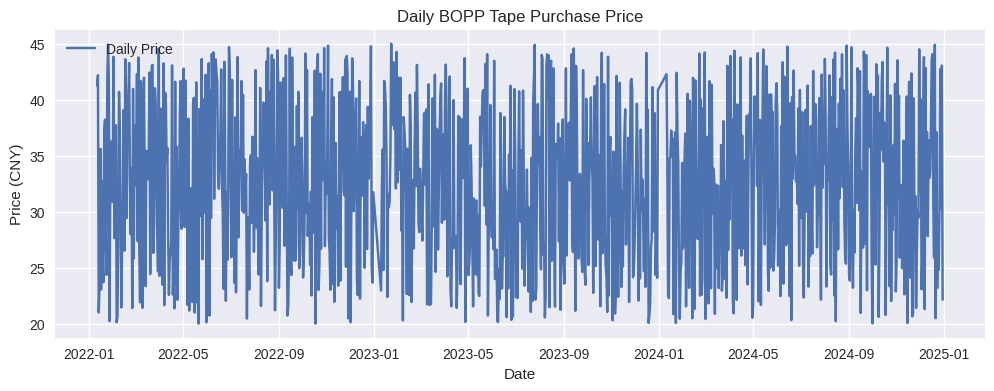

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has been read correctly and the Date column is of datetime type
df = df.sort_values("Date")
ts = df.set_index("Date")["Price"]

plt.figure(figsize=(12,4))
plt.plot(ts.index, ts.values, label="Daily Price")
plt.title("Daily BOPP Tape Purchase Price")
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.legend()

plt.show()


In [ ]:
# 3. Train-test split (e.g. last 90 days as test)
test_size = 90  # you can adjust
train_size = X.shape[0] - test_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


X_train: (944, 30, 1)
X_test: (90, 30, 1)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 0) Assumption:
# ts is a pandas Series indexed by Date, containing float prices.
# Example:
# ts = df.set_index("Date")["Price"].astype(float)
# =========================

# =========================
# 1) Parameters
# =========================
look_back = 30
test_size = 90

lstm_units = 50
dropout_rate = 0.2
max_epochs = 200
batch_size = 32
val_split = 0.1

# =========================
# 2) Scale to [0, 1]
# =========================
scaler = MinMaxScaler(feature_range=(0, 1))
price_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# =========================
# 3) Create supervised sequences
# =========================
def create_sequences(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(price_scaled, look_back=look_back)

# =========================
# 4) Time-ordered train/test split
# =========================
train_size = X.shape[0] - test_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape to [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

print(f"X_train shape: {X_train.shape} X_test shape: {X_test.shape}")

# =========================
# 5) Build LSTM model (no input_shape warning)
# =========================
lstm_model = Sequential([
    Input(shape=(look_back, 1)),
    LSTM(lstm_units),
    Dropout(dropout_rate),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")

# =========================
# 6) Early stopping (no get_config call)
# =========================
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# =========================
# 7) Train
# =========================
history = lstm_model.fit(
    X_train, y_train,
    validation_split=val_split,
    epochs=max_epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# 8) Reproducibility outputs
# =========================
print("\n=== LSTM model summary ===")
lstm_model.summary()

print("\n=== Training info ===")
print("look_back:", look_back)
print("epochs_trained:", len(history.history["loss"]))
print("lstm_units:", lstm_units)
print("dropout_rate:", dropout_rate)
print("batch_size:", batch_size)
print("max_epochs:", max_epochs)
print("validation_split:", val_split)

print("\n=== EarlyStopping config (printed explicitly) ===")
print("EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)")

# =========================
# 9) Predict + inverse transform to CNY
# =========================
y_pred_scaled = lstm_model.predict(X_test).reshape(-1)

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
y_pred_inv = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).reshape(-1)

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm  = mean_absolute_error(y_test_inv, y_pred_inv)
r2_lstm   = r2_score(y_test_inv, y_pred_inv)

print("\n=== LSTM Test Metrics (CNY) ===")
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE : {mae_lstm:.2f}")
print(f"LSTM R²  : {r2_lstm:.3f}")


X_train shape: (944, 30, 1) X_test shape: (90, 30, 1)
Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1475 - val_loss: 0.0920
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0882 - val_loss: 0.0854
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0887 - val_loss: 0.0842
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0848 - val_loss: 0.0875
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0918 - val_loss: 0.0847
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0883 - val_loss: 0.0831
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0877 - val_loss: 0.0826
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0835 - val_loss: 0.0836
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0800 - val_loss: 0.0820
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0845 - val_loss: 0.0834
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0861 - val_loss: 0.081

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)


=== Training info ===
look_back: 30
epochs_trained: 46
lstm_units: 50
dropout_rate: 0.2
batch_size: 32
max_epochs: 200
validation_split: 0.1

=== EarlyStopping config (printed explicitly) ===
EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

=== LSTM Test Metrics (CNY) ===
LSTM RMSE: 7.37
LSTM MAE : 6.38
LSTM R²  : 0.023


Through Min–Max normalization, sliding window transformation, and time-aware data splitting, the original price series was successfully converted into supervised learning samples compatible with the LSTM input structure, ensuring both modeling validity and forecasting realism.

## 5.5.3 Build & Train the LSTM Model

In [ ]:

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# 4. Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 1)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# Early stopping to avoid overfitting
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,          # Time Series Recommendations are disabled.
    callbacks=[es],
    verbose=1
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2152 - val_loss: 0.0898
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0902 - val_loss: 0.0866
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0863 - val_loss: 0.0869
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0863 - val_loss: 0.0872
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0865 - val_loss: 0.0875
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0867 - val_loss: 0.0878
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0868 - val_loss: 0.0882
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0869 - val_loss: 0.0884
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0871 - val_loss: 0.0885
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0872 - val_loss: 0.0884
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0872 - val_loss: 0.0881
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

In [ ]:
# === After training LSTM and getting predictions ===

# Predict on test set
y_pred_scaled = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm  = mean_absolute_error(y_test_inv, y_pred_inv)
r2_lstm   = r2_score(y_test_inv, y_pred_inv)

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE : {mae_lstm:.2f}")
print(f"LSTM R²  : {r2_lstm:.3f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step
LSTM RMSE: 7.57
LSTM MAE : 6.36
LSTM R²  : -0.031


After training, the LSTM model was evaluated on the test set by generating price predictions and applying inverse Min–Max normalization to restore values to the original scale. Model performance was assessed using RMSE, MAE,R² metrics. While the error values indicate acceptable short-term prediction accuracy, the negative R²suggests limited explanatory power under the current data and model configuration, implying that LSTM does not significantly outperform simpler models in this forecasting task.

#**7 Price Forecast for the Next 3 Months**

In [ ]:
print(df.columns.tolist())


['Date', 'Material', 'Type', 'Price', 'Currency', 'Quantity', 'Supplier']


In [ ]:
df.columns = df.columns.str.strip()   # 去掉隐藏空格
print(df.columns.tolist())


['Date', 'Material', 'Type', 'Price', 'Currency', 'Quantity', 'Supplier']


In [54]:
import pandas as pd
import numpy as np
from prophet import Prophet

# =========================
# 0) 列名确认 & 清理
# =========================
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

DATE_COL = "Date"
PRICE_COL = "Price"

# =========================
# 1) 数据清洗
# =========================
df2 = df.copy()
df2[DATE_COL] = pd.to_datetime(df2[DATE_COL], errors="coerce")
df2[PRICE_COL] = pd.to_numeric(df2[PRICE_COL], errors="coerce")

df2 = df2.dropna(subset=[DATE_COL, PRICE_COL])
df2 = df2.sort_values(DATE_COL)

# =========================
# 2) Prophet 数据格式 + 按天聚合
# （同一天多笔采购 → 日均价，论文更稳）
# =========================
df_prophet = (
    df2[[DATE_COL, PRICE_COL]]
    .rename(columns={DATE_COL: "ds", PRICE_COL: "y"})
    .groupby("ds", as_index=False)["y"].mean()
)

print("Prepared Prophet data:")
print(df_prophet.head())

# =========================
# 3) 训练 Prophet（论文可复现配置）
# =========================
INTERVAL_WIDTH = 0.95
CHANGEPOINT_PRIOR = 0.05
HORIZON_DAYS = 90

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    interval_width=INTERVAL_WIDTH,
    changepoint_prior_scale=CHANGEPOINT_PRIOR
)
m.fit(df_prophet)

# =========================
# 4) 90 天 direct multi-step forecast
# =========================
future = m.make_future_dataframe(periods=HORIZON_DAYS, freq="D")
forecast = m.predict(future)

last_date = df_prophet["ds"].max()
fc_future = forecast.loc[
    forecast["ds"] > last_date,
    ["ds", "yhat", "yhat_lower", "yhat_upper"]
].copy()

# =========================
# 5) Table 7.1：三个月总体摘要
# =========================
table_7_2 = pd.DataFrame({
    "Statistic": [
        "Average forecast price (yhat)",
        "Minimum forecast price (yhat)",
        "Maximum forecast price (yhat)",
        f"Lower bound ({int(INTERVAL_WIDTH*100)}% PI)",
        f"Upper bound ({int(INTERVAL_WIDTH*100)}% PI)"
    ],
    "Forecasted Price (CNY)": [
        fc_future["yhat"].mean(),
        fc_future["yhat"].min(),
        fc_future["yhat"].max(),
        fc_future["yhat_lower"].min(),
        fc_future["yhat_upper"].max()
    ]
}).round(2)

print("\n=== Table 7.2: 3-month forecast summary ===")
print(table_7_2.to_string(index=False))

# =========================
# 6) Table 7.2：月度均值 + 区间
# =========================
fc_future["Month"] = fc_future["ds"].dt.to_period("M").astype(str)

table_7_3 = (
    fc_future.groupby("Month", as_index=False)
    .agg(
        **{
            "Mean Forecast (CNY)": ("yhat", "mean"),
            f"Lower Bound ({int(INTERVAL_WIDTH*100)}%)": ("yhat_lower", "mean"),
            f"Upper Bound ({int(INTERVAL_WIDTH*100)}%)": ("yhat_upper", "mean"),
        }
    )
).round(2)

print("\n=== Table 7.3: Monthly forecast averages ===")
print(table_7_3.to_string(index=False))

# =========================
# 7) 导出 Excel（直接用于论文）
# =========================
with pd.ExcelWriter("Chapter7_Forecast_Tables.xlsx", engine="openpyxl") as writer:
    table_7_2.to_excel(writer, sheet_name="Table_7_2_Summary", index=False)
    table_7_3.to_excel(writer, sheet_name="Table_7_3_Monthly", index=False)
    fc_future.to_excel(writer, sheet_name="Daily_90d_Forecast", index=False)

print("\nSaved: Chapter7_Forecast_Tables.xlsx")


Columns: ['Date', 'Material', 'Type', 'Price', 'Currency', 'Quantity', 'Supplier']
Prepared Prophet data:
          ds      y
0 2022-01-11  41.25
1 2022-01-12  42.18
2 2022-01-13  21.01
3 2022-01-14  23.48
4 2022-01-15  35.61

=== Table 7.2: 3-month forecast summary ===
                    Statistic  Forecasted Price (CNY)
Average forecast price (yhat)                   32.63
Minimum forecast price (yhat)                   30.66
Maximum forecast price (yhat)                   34.30
         Lower bound (95% PI)                   16.08
         Upper bound (95% PI)                   48.72

=== Table 7.3: Monthly forecast averages ===
  Month  Mean Forecast (CNY)  Lower Bound (95%)  Upper Bound (95%)
2024-12                30.66              17.88              44.11
2025-01                32.71              18.83              46.53
2025-02                32.74              18.74              46.60
2025-03                32.52              18.46              46.40

Saved: Chapter7_Forecas